<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [3]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [4]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. Import the data

In [6]:
csv_file = 'ais.csv'

In [7]:
ais = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [9]:
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [10]:
ais.tail()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
197,198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.0,183.9,93.2,m,W_Polo
198,199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.0,183.5,80.0,m,Tennis
199,200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.0,183.1,73.8,m,Tennis
200,201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.0,178.4,71.1,m,Tennis
201,202,5.38,6.3,46.0,15.7,32,21.07,34.9,6.26,72.0,190.8,76.7,m,Tennis


In [11]:
ais.describe()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,101.500000,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,58.456537,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,1.000000,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,51.250000,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,101.500000,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,151.750000,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,202.000000,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


In [12]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [13]:
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [15]:
# ANSWER
ais = ais.drop(columns=['sex', 'sport'])


In [16]:
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [17]:
ais.shape

(202, 12)

In [18]:
# Put features on same scale

scaler = StandardScaler()

ais_ss = scaler.fit_transform(ais)

In [19]:
ais_ss

array([[-1.72349742, -1.66056304,  0.21777075, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-1.70634819, -0.67553837,  0.66323597, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.68919896, -1.26655317, -1.17430808, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 1.68919896,  0.68160673, -0.39474394, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 1.70634819,  0.55027011,  0.94165174, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.72349742,  1.44773703, -0.45042709, ...,  0.54658641,
         1.10150699,  0.12181392]])

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [21]:
# ANSWER
# 2 clusters

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(ais_ss)

KMeans(n_clusters=2, random_state=42)

### 5. Get the labels for the models using the labels_ attribute.

In [23]:
# ANSWER
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [25]:
# ANSWER
Sum_of_squared_distances = [] # Creating empty list
K=range(1,15) # defining range of values to test
for k in K: # This loops each k in the range K
    km = KMeans (n_clusters=k)
    km = km.fit(ais_ss)
    Sum_of_squared_distances.append(km.inertia_)

In [26]:
print(km.inertia_)

656.0792904568278


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

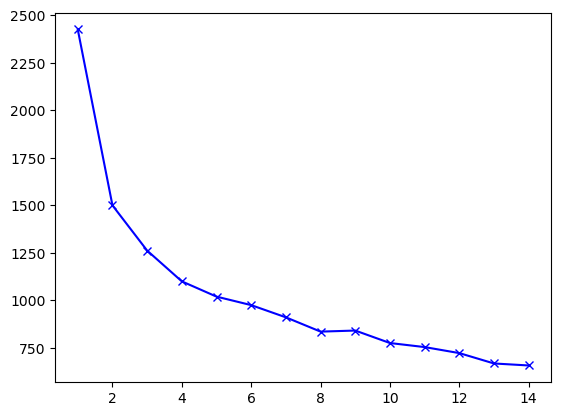

In [28]:
# ANSWER
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [29]:
# ANSWER
# 4 clusters

kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(ais_ss)

KMeans(n_clusters=4, random_state=42)

In [30]:
# ANSWER
labels4 = kmeans4.labels_
print(labels4)

[2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 0 2 2 0 0 0 0 0 0 1 3 2 2 2 2
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 3 1
 1 3 1 1 1 1 3 1 1 0 3 1 1 3 1 1 3 1 1 1 1 3 1 3 1 3 1 1 1 0 1 1 1 3 3 1 1
 1 1 1 1 0 1 0 1 1 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1 3 3 3 3
 3 3 1 3 3 1 3 1 3 3 3 1 3 1 1 3 1]


In [31]:
len(labels)

202

In [32]:
print(type('labels4'))

<class 'str'>


In [33]:
# ANSWER
Sum_of_squared_distances4 = [] # Creating empty list
K=range(1,15) # defining range of values to test
for k in K: # This loops each k in the range K
    km4 = KMeans (n_clusters=k)
    km4 = km.fit(ais_ss)
    Sum_of_squared_distances4.append(km4.inertia_)

In [34]:
print(km4.inertia_)

653.9808277243174


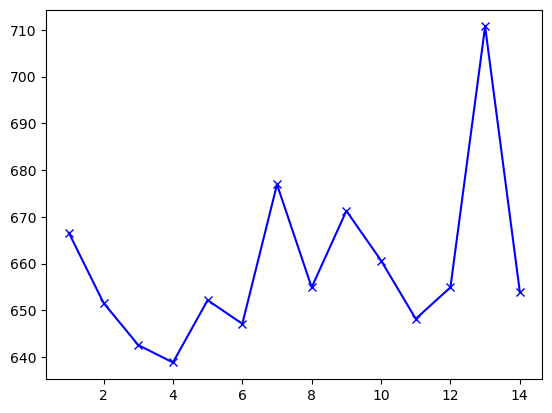

In [35]:
# ANSWER
plt.plot(K, Sum_of_squared_distances4, 'bx-')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

In [37]:
ais2 = pd.read_csv(csv_file)

In [38]:
# ANSWER
ais2['labels'] = labels

In [39]:
ais2['labels4'] = labels4

In [40]:
ais2.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport,labels,labels4
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball,0,2
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball,0,2
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball,0,2
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball,0,2
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball,0,2


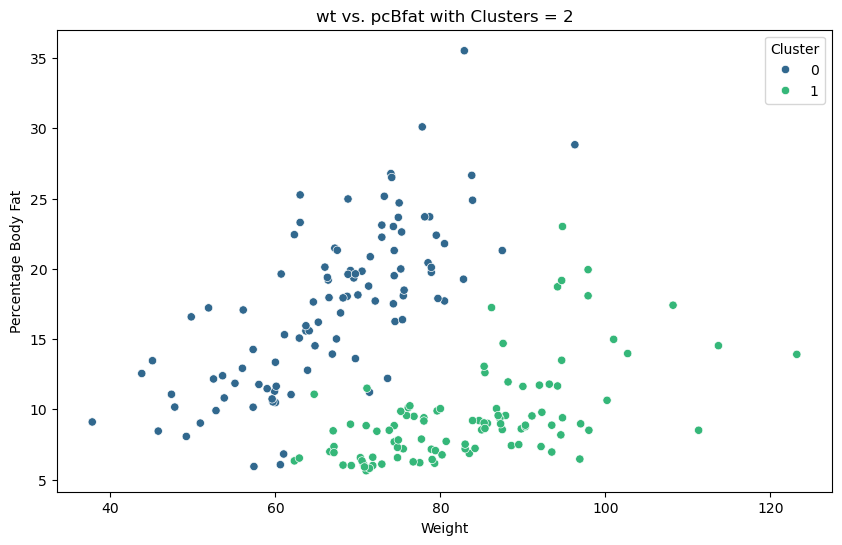

In [41]:
# Create a scatter plot of wt vs. pcBfat with clusters = 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ais2, x='wt', y='pcBfat', hue='labels', palette='viridis')
plt.title('wt vs. pcBfat with Clusters = 2')
plt.xlabel('Weight')
plt.ylabel('Percentage Body Fat')
plt.legend(title='Cluster')
plt.show()

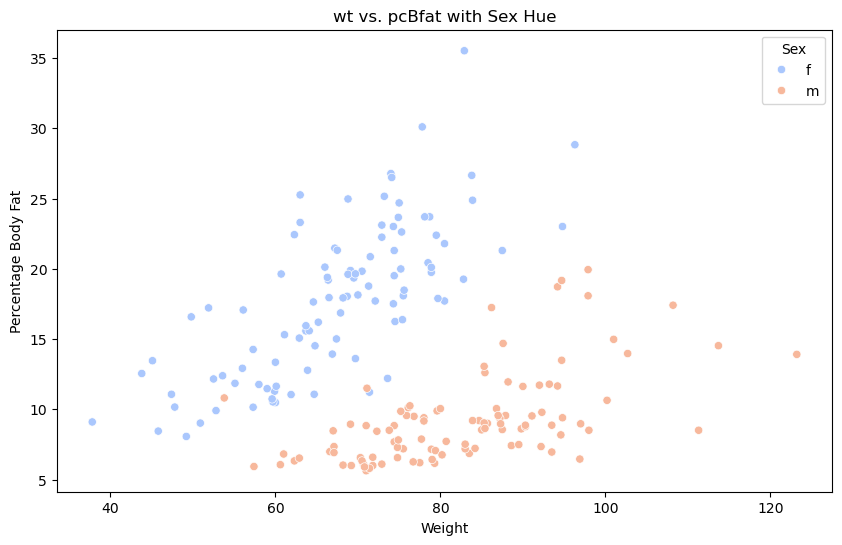

In [42]:
# 2. Plot wt vs. pcBfat Using hue='sex'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ais2, x='wt', y='pcBfat', hue='sex', palette='coolwarm')
plt.title('wt vs. pcBfat with Sex Hue')
plt.xlabel('Weight')
plt.ylabel('Percentage Body Fat')
plt.legend(title='Sex')
plt.show()

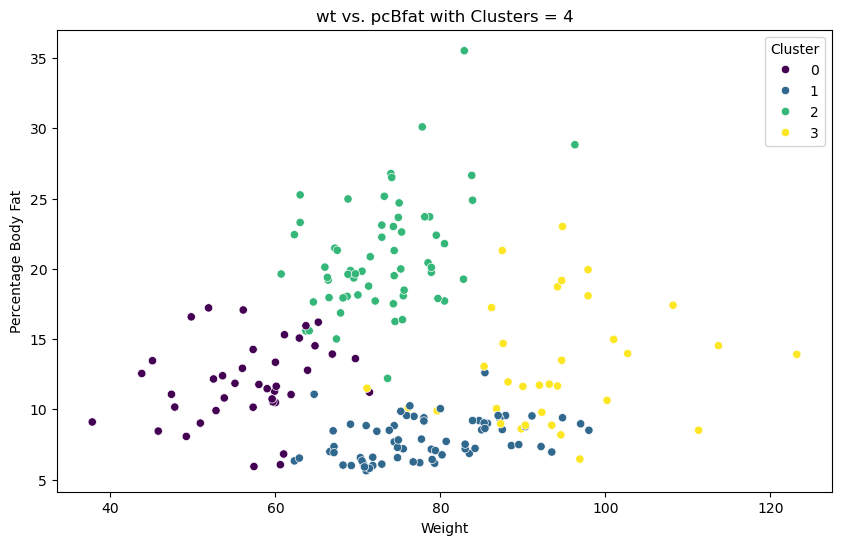

In [43]:
# Create a scatter plot of wt vs. pcBfat with clusters = 4
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ais2, x='wt', y='pcBfat', hue='labels4', palette='viridis')
plt.title('wt vs. pcBfat with Clusters = 4')
plt.xlabel('Weight')
plt.ylabel('Percentage Body Fat')
plt.legend(title='Cluster')
plt.show()

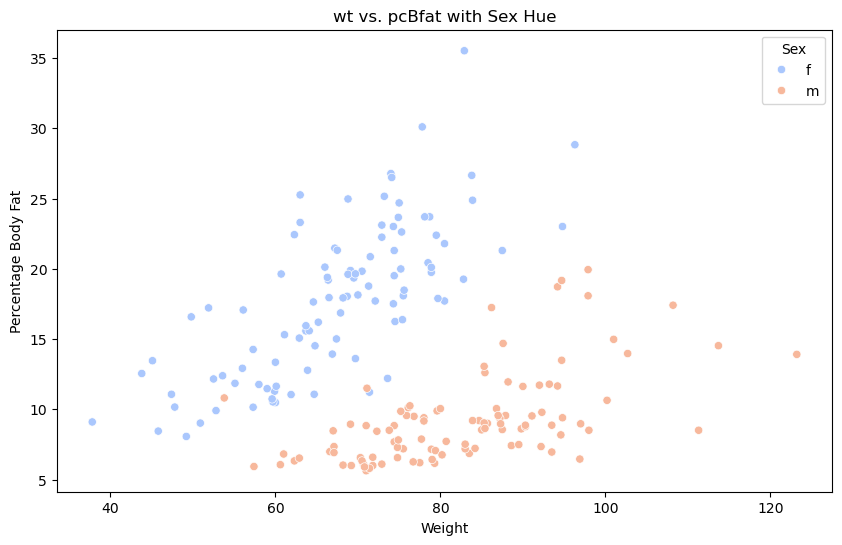

In [44]:
#Plot wt vs. pcBfat Using hue='sex'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ais2, x='wt', y='pcBfat', hue='sex', palette='coolwarm')
plt.title('wt vs. pcBfat with Sex Hue')
plt.xlabel('Weight')
plt.ylabel('Percentage Body Fat')
plt.legend(title='Sex')
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



